<a href="https://colab.research.google.com/github/bramadi/Data-Science-for-Biomedical-Data-Analysis/blob/main/Copy_of_Gene_Clustering_after_tSNE_or_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To cluster genes, instead of samples, we need to keep the objects as rows instead of transposing the data. When loading data, do not transpose it but do make sure to eliminate non numeric data from the main matrix and keep the gene and sample labels in variables that later can be used.

# Load Data and set initial objects

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics

#load data
df_load = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_ExprData_marked.txt',sep='\t',header=(0)) 
labels_list = df_load.loc[[0]] 

#save sample names and clean them
#sample_names = df_load.loc[0] 
sample_names = list(df_load)[1:] 
labels = np.unique(labels_list) 
labels = np.delete(labels, np.where(labels == 'Group')) 

#save gene Ids and clean them
geneids = df_load['id']
geneids = geneids.drop([0]) 

#clean data
data=df_load.drop([0]) 

#will be used later on to add cluster IDs
df_clust = data
df_clust.set_index(['id'], inplace=True)

#data=data.drop(['id'], axis=1) 
datafinal = data.astype(float)

datafinal.shape

(6912, 38)

# PCA

PCA will help understand variance for the full dataset. After we perform PCA, we will see clusters in variance that explains well the fiull dataset.

In [ ]:
#first, we are going to explore the data (without transposing as before)
from sklearn.decomposition import PCA

pca_all = PCA().fit(datafinal)

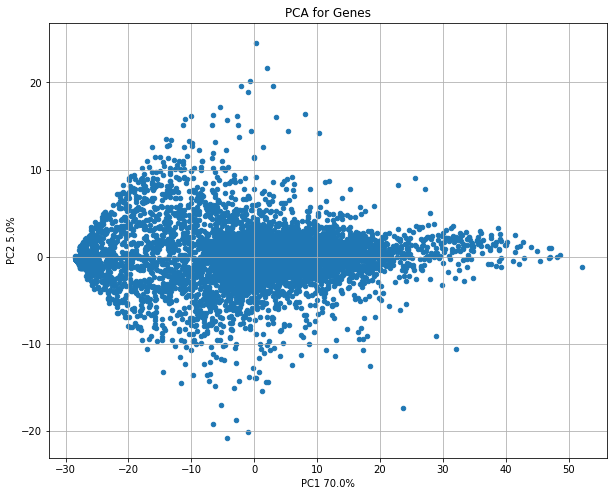

In [ ]:
#prepare a scatterplot of genes based on PC1 and PC2
X_pca = pca_all.transform(datafinal)


d = {'GeneIds':geneids, 'PC1':X_pca[:,0], 'PC2':X_pca[:,1]}
df = pd.DataFrame(d)

#make a scatterplot

- n_componentsint, default=2
Dimension of the embedded space.

- perplexity, default=30.0
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.

- early_exaggeration, default=12.0
Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.

- learning_rate or ‘auto’, default=200.0
The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help. Note that many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than ours. So our learning_rate=200 corresponds to learning_rate=800 in those other implementations. The ‘auto’ option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size, following [4] and [5]. This will become default in 1.2.

- n_iter, default=1000
Maximum number of iterations for the optimization. Should be at least 250.

- n_iter_without_progress, default=300
Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. Note that progress is only checked every 50 iterations so this value is rounded to the next multiple of 50.


In [ ]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=40.0, early_exaggeration=10, n_iter=500, 
               n_iter_without_progress = 50, learning_rate=20, 
               verbose=0).fit_transform(X_pca)

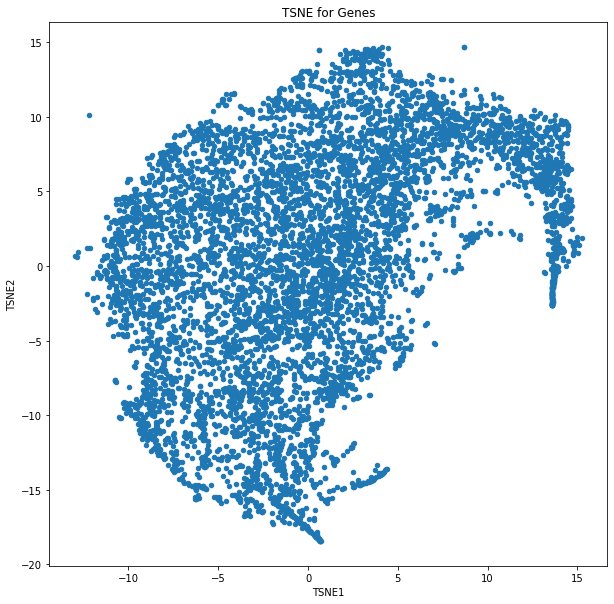

In [ ]:
d = {'GeneIds':geneids, 'PC1':X_pca[:,0], 'PC2':X_pca[:,1], 'TSNE1':tsne_em[:,0], 'TSNE2':tsne_em[:,1]}
df = pd.DataFrame(d)

#make a scatterplot

number of DBSCAN clusters is 33


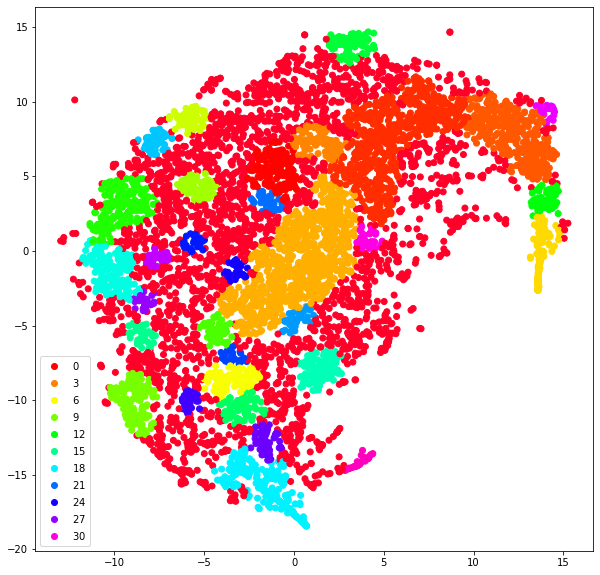

In [ ]:
from sklearn.cluster import DBSCAN

#DBSCAN eps=0.7, min_samples=30


#scatterplot

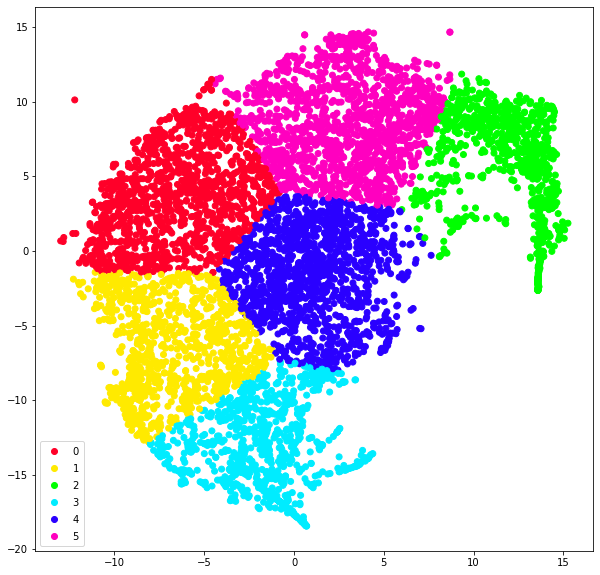

In [ ]:
#try the same with K-means

In [ ]:
pip install umap-learn

In [ ]:
pip install umap-learn[plot]

In [ ]:
import os, umap

mapper = pd.DataFrame(umap.UMAP(n_neighbors=5, min_dist=0.1).fit_transform(datafinal), columns = ['UMAP1','UMAP2'])

In [ ]:
#How to use UMAP plotting feature:
#make sure you install umap.plot by : pip install umap-learn[plot]

import umap.plot

mapper = umap.UMAP().fit(dft)
umap.plot.points(mapper, labels=dbscan_m.labels_)

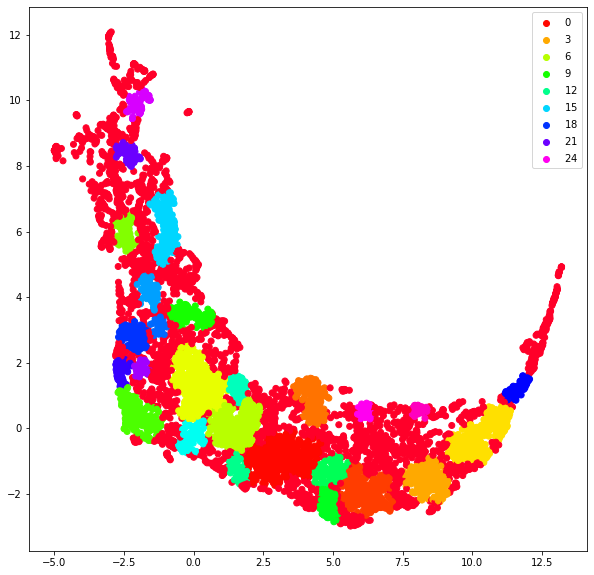

In [ ]:
dbscan_m = DBSCAN(eps=0.3, min_samples=40).fit(mapper)

#scatter plot

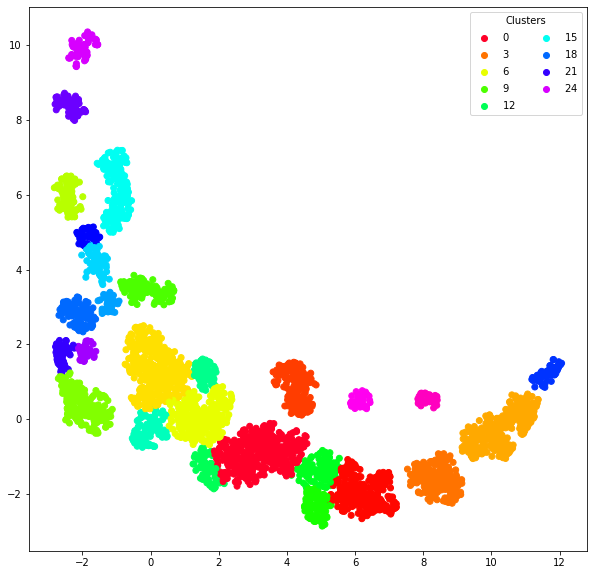

In [ ]:
mapper['DBScan'] = dbscan_m.labels_

#remove the noise cluster

plt.figure(figsize=(10, 10))
scatter = plt.scatter(mapper1['UMAP1'],mapper1['UMAP2'], c = mapper1['DBScan'], cmap ='gist_rainbow')
plt.legend(*scatter.legend_elements(), ncol=2, title='Clusters')

_ = plt.plot()

# Prepare a dataset with cluster information

**Create a new dataframe**

Create a new dataframe, which contains Cluster Groups from cluster types and coressponding genes expression among samples

In [ ]:
df_clust["DBScan"] = dbscan_m.labels_

df_DBScan = df_clust.astype(float)

df_DBScan.head()

,600MPE,AU565,BT474,BT483,BT549,CAMA1,EFM192A,EFM192B,EFM192C,HCC1143,HCC1395,HCC1419,HCC1428,HCC1569,HCC1806,HCC1937,HCC1954,HCC202,HCC3153,HCC70,JIMT1,LY2,MCF10A,MCF10F,MCF12A,MCF7,MDAMB134VI,MDAMB175VII,MDAMB231,MDAMB361,MDAMB453,MX1,SKBR3,SUM1315MO2,SUM149PT,SUM225CWN,SUM229PE,SUM52PE,DBScan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,5.32,5.30,6.64,5.60,6.61,5.24,6.66,6.62,6.41,5.19,6.16,7.29,4.78,6.14,5.66,5.80,6.20,4.69,6.50,5.49,7.29,5.23,5.63,4.82,5.64,6.07,4.79,6.25,5.19,5.80,4.63,5.98,6.19,4.97,4.15,5.82,6.40,4.67,-1.0
ENSG00000001036,6.11,4.80,4.47,4.99,6.94,5.00,5.11,5.42,4.58,4.74,6.03,5.47,4.32,6.16,5.89,5.37,6.01,4.72,5.17,5.96,6.35,5.02,5.31,6.37,5.24,6.29,5.81,4.16,6.56,5.91,5.19,4.00,5.48,4.14,5.90,5.51,5.14,6.22,-1.0
ENSG00000001084,5.78,4.01,5.14,5.11,3.63,5.93,4.11,3.68,3.23,5.01,5.81,4.50,5.17,5.61,6.19,5.02,6.79,5.97,4.77,5.85,4.78,4.27,6.80,6.25,4.50,5.08,5.21,4.24,4.12,6.00,4.16,3.19,4.29,3.95,5.26,6.63,4.38,6.38,-1.0
ENSG00000001497,4.93,6.16,5.36,5.10,6.16,5.50,6.10,6.88,5.99,6.69,5.03,5.33,6.46,4.99,5.49,5.47,5.95,4.04,4.63,4.97,6.12,4.77,5.31,4.79,5.62,5.11,5.34,4.20,5.47,3.92,5.14,5.95,4.74,4.95,5.26,4.69,6.16,5.11,0.0
ENSG00000001617,4.06,7.53,4.70,6.69,3.30,5.39,6.55,6.41,5.26,1.76,3.94,4.74,4.67,2.71,3.33,5.04,5.33,5.50,5.05,5.83,3.86,7.31,5.13,5.15,5.23,5.51,6.76,5.12,1.12,5.49,7.74,1.38,6.81,1.71,4.80,3.80,5.59,5.27,-1.0


In [ ]:
# an empty list
corrlist_DB = []
n_clusters_DB = len(set(dbscan_m.labels_)) - (1 if -1 in dbscan_m.labels_ else 0)
averagelist = []
averageDF = pd.DataFrame()

#loop for DBScan clusters
for i in range(0, n_clusters_DB): 
  
  #select only one cluster at a time
  
  

# Calculate Correlation

No handles with labels found to put in legend.


Text(0.5, 1.0, 'DBScan cluster Averages')

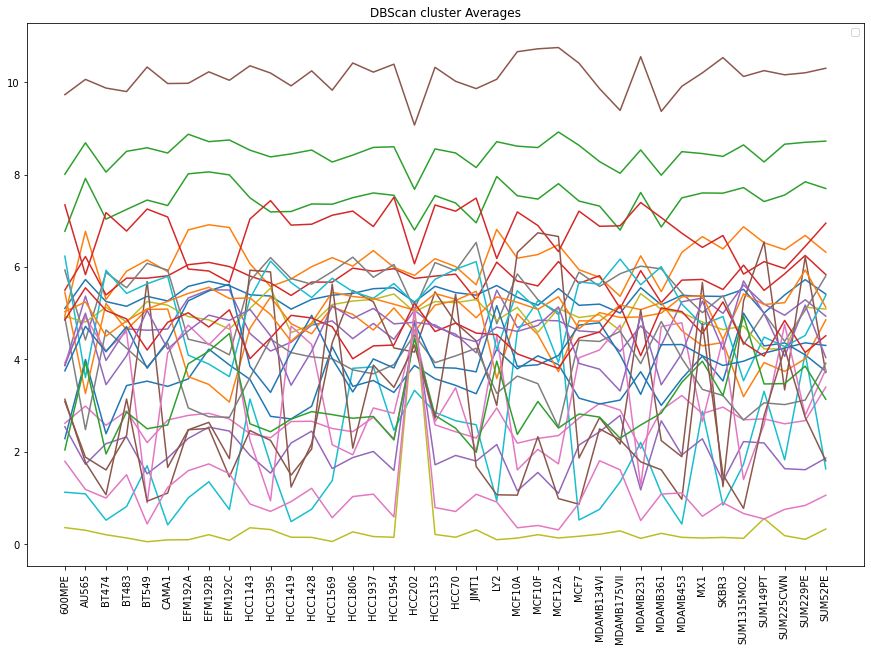

In [ ]:
plt.figure(figsize=(15, 10))
line = plt.plot(averageDF)
plt.xticks(rotation=90)
plt.legend()
plt.title("DBScan cluster Averages")


In [ ]:
#DBscan correlation
DB_corr = pd.DataFrame(corrlist_DB, columns=["Cluster","Correlation"])

DB_corr
DB_corr.shape

(27, 2)

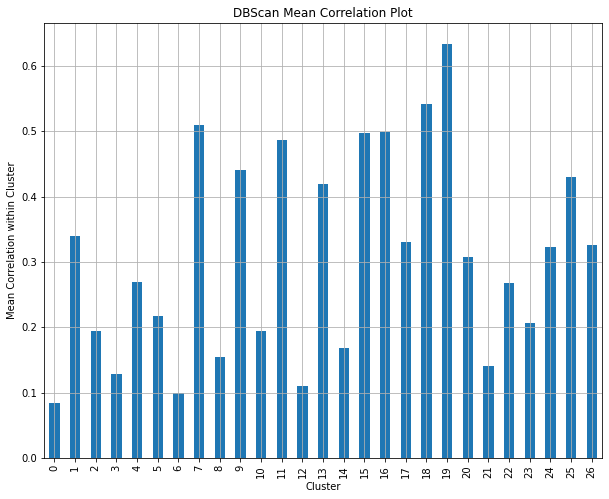

In [ ]:
DB_corr.plot.bar(
    x='Cluster', y='Correlation', 
    figsize=(10,8),
    title='DBScan Mean Correlation Plot', 
    legend=False,
    sharex=False, 
    grid=True).set(
        ylabel='Mean Correlation within Cluster')
    
_ = plt.plot()

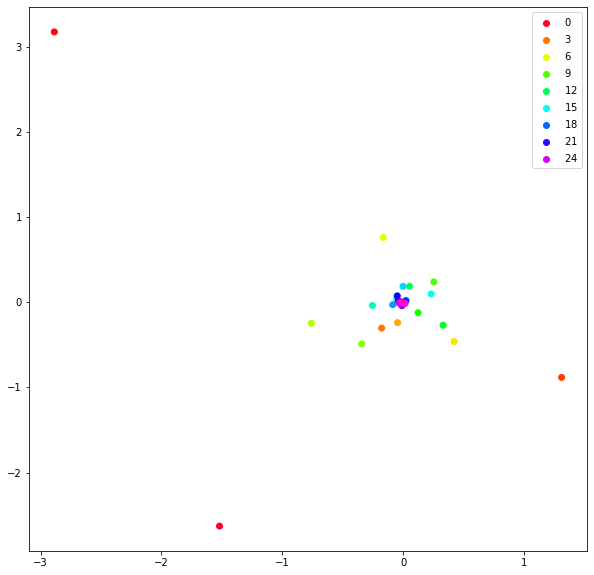

In [ ]:
pca_clust = PCA().fit_transform(averageDF)
pca_clust = pd.DataFrame(pca_clust)

pca_clust = pca_clust.T

pca_clust['clust'] = pca_clust.index

pca_clust.head()

plt.figure(figsize=(10, 10))
scatter = plt.scatter(pca_clust[0],pca_clust[1], c = pca_clust['clust'], cmap ='gist_rainbow')
plt.legend(*scatter.legend_elements())


In [ ]:
DBSCAN_Cluster11 = df_DBScan[df_DBScan['DBScan'] == 19]
DBSCAN_Cluster11 = DBSCAN_Cluster11.drop(['DBScan'], axis=1)

#write CSV
DBSCAN_Cluster11.to_csv('DBSCAN_Cluster11.csv')

# REMOVE HCC202

In [ ]:
#prepare new data

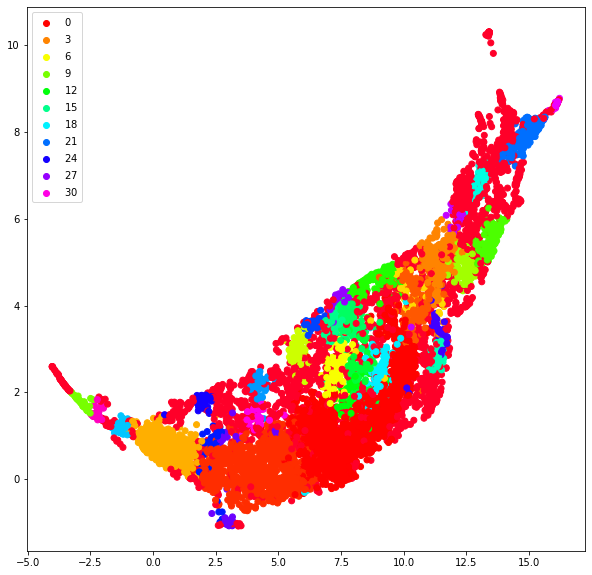

In [ ]:
#perform UMAP and DBSCAN

# Practice:
1. try to prepare inbetween correlation calculations and plots for OPTICS vs KMEANS (or DBScan vs KMEANS)
2. compare clusters between themselves to see what each set of genes might be doing in terms of biological function (you can use https://david.ncifcrf.gov/summary.jsp)
3. Play around with OPTICS parameters (min_samples and epsilon to find better clustering)

# Reflection:

what is the best way to use technical scores (SSE or silhouette) and/or biological intepretation when using clustering for omics data?

